In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
from IPython.display import display

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    0.651042
1    0.348958
Name: Outcome, dtype: float64
[[ 0.49456278  1.0112392  -0.25987348  0.03186715 -0.13156756  0.68444725
   0.3523635   0.11862149]]
[-0.86603626]
[0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 1 0 0 1]
[[0.56318875 0.43681125]
 [0.30171548 0.69828452]
 [0.70425956 0.29574044]
 [0.86366492 0.13633508]
 [0.97118166 0.02881834]
 [0.22454146 0.77545854]]


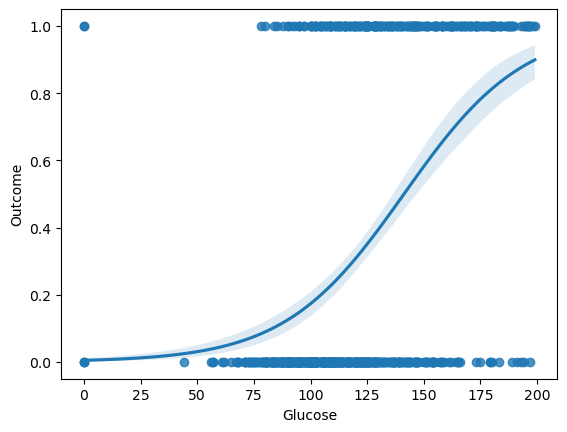

* Glucose accounts for the largest variability in Outcome. For this reason I created a regression plot with only this variable to see the probability of different glucose associating with each outcome.
Confusion Matrix: 
[[91  8]
 [23 32]]
Accuracy Score: 0.7987012987012987
F1 Score: 0.6736842105263158


<Figure size 640x480 with 0 Axes>

In [21]:
# import and visualize diabetes data

diabetes = pd.read_csv("diabetes2.csv")
display(diabetes.head())
print(diabetes.Outcome.value_counts(normalize = True))

# create features to include on x_axis of regression

diabetes_x = diabetes[["Pregnancies", "Glucose", "BloodPressure", 
                             "SkinThickness", "Insulin", "BMI",
                             "DiabetesPedigreeFunction" , "Age"]]

# create features for test variable (y-axis) of regression

diabetes_y = diabetes.Outcome

# scale data

scaler = StandardScaler()

diabetes_x = scaler.fit_transform(diabetes_x)

# train and test data. set test_size to 0.2

x_train, x_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size = 0.2)

# call in LogisticRegression function, fit and predict data

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

# print intercept and coefficients of fitted data
# print predicted y_values and corresponding probabilities

print(lr.coef_)
print(lr.intercept_)
print(lr.predict(x_test))
print(lr.predict_proba(x_test)[0:6])

# show regression plot of most influential independent variable: glucose

sns.regplot(data = diabetes, x = "Glucose", y = "Outcome", logistic = True)
plt.show()
plt.axhline(y = 0.5, linestyle = "--", color = "r")
plt.clf()

# print accuracy score, f1_score, and confusion matrix

print("* Glucose accounts for the largest variability in Outcome. For this reason I created a regression plot with only this variable to see the probability of different glucose associating with each outcome.")
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_predict)))
print("Accuracy Score: " + str(accuracy_score(y_test, y_predict)))
print("F1 Score: " + str(f1_score(y_test, y_predict)))
